# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Muhammet Batuhan Doğan
# Student ID: 2210765004

In [126]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck!

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)



| Table            | Field          | Type/Constraints                   |
|------------------|----------------|------------------------------------|
| Clients          | CustomerID      | PK, int                           |
|                  | CustomerName      | TEXT                            |
|                  | CustomerEmail  | TEXT                               |
|                  | CustomerPhone   | TEXT                              |
|------------------|----------------|------------------------------------|
| Airline_Partnerships | AirplaneID | PK, int                            |
|                  | AirlineName   | TEXT                                |
|------------------|----------------|------------------------------------|
| Flights          | FlightID  | PK, int                                 |
|                  | AirplaneID     | FK (Airline_Partnerships), int     |
|                  | Flight_Departure | TEXT                             |
|                  | Flight_Destination   | TEXT                         |
|                  | Flight_Date | DATE                                  |
|------------------|----------------|------------------------------------|
| Hotels           | HotelID       | PK, int                             |
|                  | HotelName     | TEXT                                |
|                  | HotelLocation       | TEXT                          |
|                  | HotelRating| INTEGER                                |
|------------------|----------------|------------------------------------|
| Travel_Bookings  | BookingID      | PK, int                            |
|                  | CustomerID     | FK (Clients), int                  |
|                  | FlightID       | FK (Flights), int                  |
|                  | HotelID       | FK (Hotels), int                    |
|------------------|----------------|------------------------------------|
| Feedback         | feedback_id    | PK, int                            |
|                  | CustomerID      | FK (Clients), int                 |
|                  | AirlineID     | FK (Airline_Partnerships), int     |
|                  | HotelID       | FK (Hotels), int                    |
|                  | Review          | TEXT                              |
|------------------|----------------|------------------------------------|



i write also single-line representation of each table's schema

Clients Table: CustomerID (PK, int), CustomerName (TEXT), CustomerEmail (TEXT), CustomerPhone (TEXT)

Airline_Partnerships Table: AirplaneID (PK, int), AirlineName (TEXT)

Flights Table: FlightID (PK, int), AirplaneID (FK Airline_Partnerships), Flight_Departure (TEXT), Flight_Destination (TEXT), 
Flight_Date (DATE)

Hotels Table: HotelID (PK, int), HotelName (TEXT), HotelLocation (TEXT), HotelRating (INTEGER)

Travel_Bookings Table: BookingID (PK, int), CustomerID (FK Clients), FlightID (FK Flights), HotelID (FK Hotels)

Feedback Table: feedback_id (PK, int), CustomerID (FK Clients), AirlineID (FK Airline


In [134]:
conn = sqlite3.connect('Skyward_memory.db')  # i use 'Skyward_memory' to create  database.
cursor = conn.cursor() 
# i load csv file into df.
booking_details_df = pd.read_csv('BookingDetails.csv')
feedback_df = pd.read_csv('FeedbackDetails.csv')

# i choose specific columns for my table schema.
Clients = ['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']
Airline_Partnerships = ['AirplaneID', 'AirlineName']
Flights  = ['FlightID', 'AirplaneID', 'Flight_Departure', 'Flight_Destination', 'Flight_Date']
Hotels = ['HotelID', 'HotelName','HotelLocation', 'HotelRating']
Travel_Bookings = ['BookingID', 'CustomerID','FlightID', 'HotelID']
Feedback = ['FeedbackID', 'CustomerID', 'AirlineID','HotelID', 'Review']

# i created new dataframe 
selected_data_df1 = booking_details_df[Clients]
selected_data_df2= booking_details_df[Airline_Partnerships]
selected_data_df3 = booking_details_df[Flights]
selected_data_df4 = booking_details_df[Hotels]
selected_data_df5 = booking_details_df[Travel_Bookings]
selected_data_df6 = feedback_df[Feedback]


selected_data_df1.to_sql('Clients', conn, if_exists='replace', index=False) # i insert data into Clients table.
selected_data_df2.to_sql('Airline_Partnerships', conn, if_exists='replace', index=False) #i insert data into Airline_Partnerships table.
selected_data_df3.to_sql('Flights', conn, if_exists='replace', index=False)# i insert data into Flights table.
selected_data_df4.to_sql('Hotels', conn, if_exists='replace', index=False)# i insert data into Hotels table.
selected_data_df5.to_sql('Travel_Bookings', conn, if_exists='replace', index=False)# i insert data into Travel_Bookings table.
selected_data_df6.to_sql('Feedback', conn, if_exists='replace', index=False)# i insert data into Feedback table.

conn.commit()
conn.close()


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [135]:
conn = sqlite3.connect('Skyward_memory.db')
# i write query find the total number of bookings made for each hotel
query = '''
    SELECT Hotels.HotelID, Hotels.HotelName, COUNT(Travel_Bookings.BookingID) as NumberofBookings
    FROM Hotels
    LEFT JOIN Travel_Bookings ON Hotels.HotelID = Travel_Bookings.HotelID
    GROUP BY Hotels.HotelID, Hotels.HotelName;
'''

# i execute the query
result = pd.read_sql_query(query, conn)

# i display the result
print(result)

# i close the connection.
conn.close()

    HotelID          HotelName  NumberofBookings
0       NaN               None                 0
1    1464.0         Opal Motel               121
2    1513.0      Diamond Plaza                36
3    1610.0      Golden Suites               256
4    1647.0       Silver Villa               100
5    1919.0      Emerald Motel               225
6    2035.0     Sapphire Villa               196
7    2049.0         Jade Motel                25
8    2206.0        Jade Suites                49
9    2504.0       Pearl Resort               144
10   2525.0     Emerald Resort                81
11   2769.0         Golden Inn               196
12   3096.0        Jade Resort               121
13   3107.0      Silver Palace                64
14   3378.0      Silver Resort               225
15   3670.0      Diamond Villa               100
16   3678.0     Sapphire Villa                64
17   4024.0     Diamond Resort               225
18   4147.0     Pearl Hideaway                64
19   4340.0        O

## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [136]:
conn = sqlite3.connect('Skyward_memory.db')  

# i write query to retrieve the name and contact details of clients who have provided feedback for both flights and hotels
query = """
    SELECT DISTINCT C.CustomerName, C.CustomerEmail, C.CustomerPhone
    FROM Clients C
    JOIN Feedback F ON C.CustomerID = F.CustomerID
    WHERE EXISTS (
        SELECT 1
        FROM Feedback F1
        WHERE F1.CustomerID = F.CustomerID AND F1.AirlineID IS NOT NULL
    )
    AND EXISTS (
        SELECT 1
        FROM Feedback F2
        WHERE F2.CustomerID = F.CustomerID AND F2.HotelID IS NOT NULL
    );
"""

# i execute the query and fetch the result into a dataframe
result_df = pd.read_sql_query(query, conn)

# i display the result
result_df

,CustomerName,CustomerEmail,CustomerPhone
0,Sophia Rodriguez,sophia.rodriguez@mail.com,555-7717570
1,Ava Jones,ava.jones@mail.com,555-2606180
2,Logan Garcia,logan.garcia@mail.com,555-8723852
3,Sophia Jones,sophia.jones@mail.com,555-5176700
4,Sophia Johnson,sophia.johnson@mail.com,555-8333408
...,...,...,...
104,Ava Davis,ava.davis@mail.com,555-4376898
105,Mia Williams,mia.williams@mail.com,555-4798996
106,Sophia Johnson,sophia.johnson@mail.com,555-2448547
107,Liam Jones,liam.jones@mail.com,555-3294076


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [137]:
conn = sqlite3.connect('Skyward_memory.db')  
# i write query to find average feedback rating across all hotels
query = "SELECT AVG(HotelRating) AS AverageRating FROM Hotels;"

average_rating_df = pd.read_sql_query(query, conn)

average_rating = average_rating_df['AverageRating'].values[0]
print(f"average feedback rating across all hotels is: {average_rating}")

average feedback rating across all hotels is: 3.3586065573770494


in there i calculated average rating for all hotels and then use it where hotel rating part.

In [138]:
conn = sqlite3.connect('Skyward_memory.db')  

#i write the query to identify hotels with a feedback rating lower than average.
query = """
    SELECT DISTINCT HotelName, HotelRating
    FROM Hotels
    WHERE HotelRating < (3.3586065573770494);
"""

result_df = pd.read_sql_query(query, conn)

result_df




,HotelName,HotelRating
0,Pearl Resort,2.0
1,Golden Resort,3.0
2,Ruby Palace,1.0
3,Golden Resort,1.0
4,Golden Villa,3.0
5,Sapphire Suites,2.0
6,Opal Plaza,2.0
7,Diamond Plaza,2.0
8,Diamond Inn,2.0
9,Golden Hideaway,3.0


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [139]:
conn = sqlite3.connect('Skyward_memory.db')  
# SQL query to find clients who have stayed in at least three different hotels and flown with at least two different airlines
query = """
    SELECT C.CustomerID, C.CustomerName, COUNT(DISTINCT TB.BookingID) AS TotalBookings
    FROM Clients C
    JOIN Travel_Bookings TB ON C.CustomerID = TB.CustomerID
    JOIN Flights F ON TB.FlightID = F.FlightID
    JOIN Hotels H ON TB.HotelID = H.HotelID
    GROUP BY C.CustomerID, C.CustomerName
    HAVING COUNT(DISTINCT H.HotelID) >= 3 AND COUNT(DISTINCT F.AirplaneID) >= 2;
"""

# i execute the query and fetch the result into a dataframe.
result_df = pd.read_sql_query(query, conn)

# i display the result
result_df

,CustomerID,CustomerName,TotalBookings


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this)

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [140]:
os.chdir(r'C:\Users\mbdn1\Desktop') # i change my directory to access the file.

titanic_df = pd.read_csv('titanic.csv') # read dataset to dataframe.


"""to analyze the survival rate by gender and class i choose gender part as index and class part as columns,
also i use an aggregation function which is mean to see survival rate."""
pivot_table = pd.pivot_table(titanic_df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
pivot_table


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


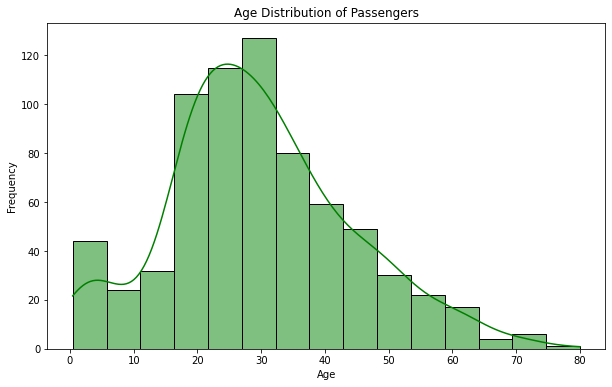

In [141]:
titanic_df_age = titanic_df['Age'] # i get age column as a pd serie

plt.figure(figsize=(10, 6)) # to set figure size.

bin_width = 3.5 * titanic_df_age.std() / (len(titanic_df_age) ** (1/3)) # determine bin_width based on Scoot's Rule.
num_bins = int((titanic_df_age.max() - titanic_df_age.min()) / bin_width) # determine num_bins based on Scoot's Rule.



# i create  histogram using seaborn.
sns.histplot(titanic_df_age, bins=num_bins, kde=True, color='green') # kde is true in there to see non parametric curve.

# i add label's names and title
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show() # Show the plot

In [142]:
5*bin_width # to see starting point of most common age group aboard the Titanic.

26.41839256803596

In [143]:
6*bin_width # to see ending point of most common age group aboard the Titanic.

31.702071081643147

# comment part
Choosing the right number of bins and width i use Scoot's Rule there are most way to determine bin i tried some of them and i think most appropriate is Scoot's Rule.

Most common age group aboard the Titanic is 6th bin for my visualization which start closely 26.42 and end 31.70 in there i want to round the numbers for  more interpretable and easier understanding so at the end i say the most common age group aboard the Titanic falls in the range of 26 to 32 years.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

In [144]:
embarkation_counts = titanic_df['Embarked'].value_counts()
embarkation_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

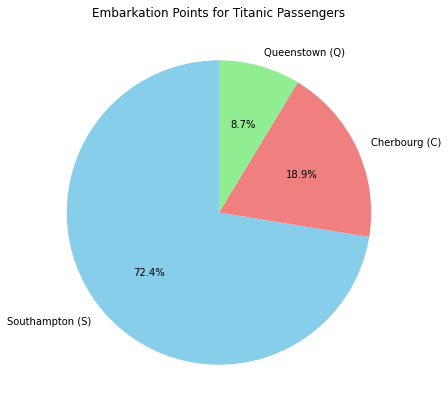

In [145]:
embarkation_counts = titanic_df['Embarked'].value_counts() # determine how many embarkation depend on category.

# i plot the pie chart
plt.figure(figsize=(7, 7)) # i set to size of the figure.

""" in there embarkation_counts the data which i gonna pie chart. autopct is the decimal point decisive and startangle is the 
where first label start."""
plt.pie(embarkation_counts, labels=['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Embarkation Points for Titanic Passengers')
plt.show()




In [146]:
# Identify the port with the highest boarding
highest_boarding_port = embarkation_counts.idxmax()
print("highest_boarding_port = " + highest_boarding_port) # S Southampton.

filtered_data = titanic_df[titanic_df['Embarked'] == highest_boarding_port] # filter data for Southampton.


highest_boarding_port = S


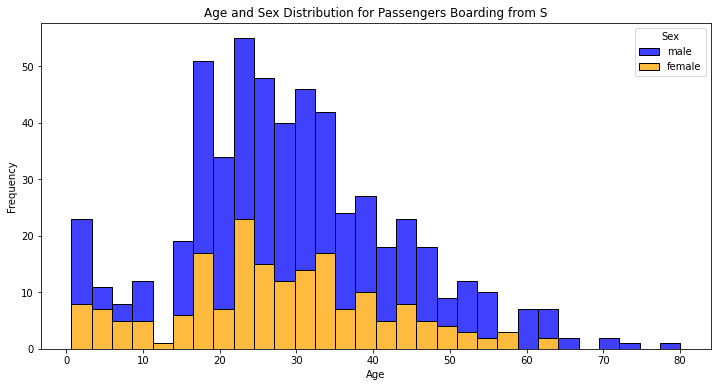

In [147]:
# Analyze age and sex distribution from this port
plt.figure(figsize=(12, 6)) # i set to size of the figure.

""" i use to determine bin Square-root choice which takes the square root of the number of data points in the sample
and it closely 30. Also i use color coding a categorical attribute for can be effective"""
sns.histplot(data=filtered_data, x='Age', hue='Sex', bins=30, multiple='stack', palette=['blue', 'orange']) 
plt.title(f'Age and Sex Distribution for Passengers Boarding from {highest_boarding_port}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# the "women and children first" evacuation policy
i observe this looking for my histogram there is no women and children first evacuation policy because clustering is more in the part where men are. Also for children it is similar clustering is more in the part where adults are.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

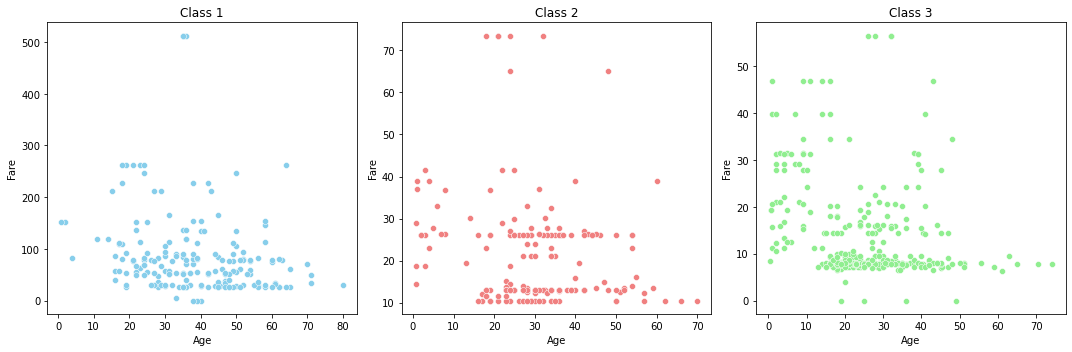

In [148]:
# i create scatter plot for each class.
class1_data = titanic_df[titanic_df['Pclass'] == 1]
class2_data = titanic_df[titanic_df['Pclass'] == 2]
class3_data = titanic_df[titanic_df['Pclass'] == 3]

# i set to figure size.
plt.figure(figsize=(15, 5))

# class 1 plot
plt.subplot(1, 3, 1) # to indicate first subplot.
sns.scatterplot(data=class1_data, x='Age', y='Fare', color='skyblue')
plt.title('Class 1')
plt.xlabel('Age')
plt.ylabel('Fare')

# class 2 plot
plt.subplot(1, 3, 2)  # to indicate second subplot.
sns.scatterplot(data=class2_data, x='Age', y='Fare', color='lightcoral')
plt.title('Class 2')
plt.xlabel('Age')
plt.ylabel('Fare')

# class 3 plot 
plt.subplot(1, 3, 3) # to indicate third subplot.
sns.scatterplot(data=class3_data, x='Age', y='Fare', color='lightgreen')
plt.title('Class 3')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.tight_layout() # to adjust layout.

plt.show()

# comment part

The scatter plot illustrates the relationship between passengers' ages and their corresponding fares.

For my plot class 1 and class 2 plots i may say correlation r < 0 but these r is not close to -1 i think it is about -0.1. so i do not directly say a relationship because it is really weak but maybe i say really weak negative relationships looks.Also there were outliers for these class.

Class 3 plot a bit high correlation r (as a values high). we may not say moderate negative but we say weak negative correlation.



## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


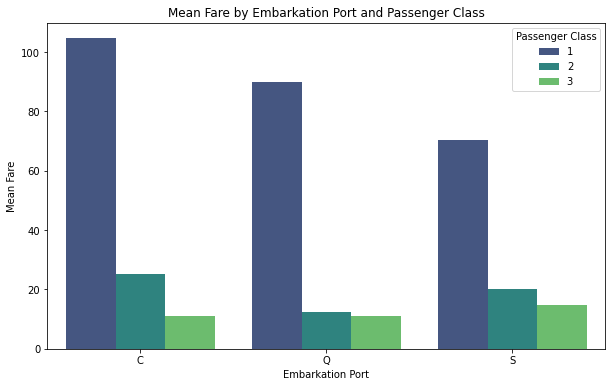

In [123]:
# i reset the index to make the result easier worki.
grouped_data = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index() 

# i create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Embarked', y='Fare', hue='Pclass', palette='viridis')

# tabel and label names
plt.title('Mean Fare by Embarkation Port and Passenger Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Mean Fare')

# to indicate passenger class.
plt.legend(title='Passenger Class')

# Show the plot
plt.show()

# comment part 
Class 1 has more mean fare for each embarkation port.

Class 3 has less mean fare for each embarkation port.

If we list the fear for the embarkation port:C > Q > S 



# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

In certain sections of this study, I utilized the AI tool ChatGPT, AIN212 course slides, AIN214 lab materials
and Google translate to enhance my understanding.